In [1]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np

In [15]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader

white = 255
black = 0

def img_tranform(fill_color):
    return transforms.Compose([
        transforms.RandomRotation(360, fill=0),

        # Define size of image and randomly centers image
    #     transforms.RandomCrop(300, padding=None, pad_if_needed=True, padding_mode='constant', fill=white),
    #     transforms.Grayscale(num_output_channels=1),

        transforms.ColorJitter(brightness=(0.8, 1), contrast=(0.45, 1)),

    ])

operators_transform = transforms.Compose([
    # Grayscale
    transforms.Grayscale(num_output_channels=1),
    # Randomly scale up and down
    transforms.RandomAffine(0, scale=(0.9, 1.1), fillcolor=white),
    
    img_tranform(white),
])

minst_transform = transforms.Compose([
    # Scale up
    transforms.Pad(70),
    transforms.RandomAffine(0, scale=(2.5, 3.2), fillcolor=0),
    
    img_tranform(black),
])

# dataset_loader = torch.utils.data.DataLoader(hymenoptera_dataset,
#                                              batch_size=4, shuffle=True,
#                                              num_workers=4)


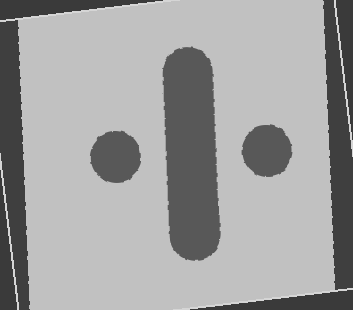

In [19]:
# Operators Dataset
operators_dataset = datasets.ImageFolder(root='operators', transform=operators_transform)
operators_dataset.transform(operators_dataset[0][0])

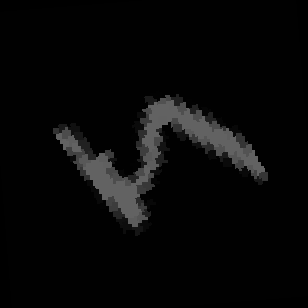

In [20]:
# Minst Dataset
minst_dataset = datasets.MNIST("", transform=minst_transform, download=True)
minst_dataset.transform(minst_dataset[0][0])